<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/PSD_histogram_ANN_r_squared_ago_26_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [ ]:
!pip install mahotas

In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [ ]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [ ]:
df=Segmenta(img)
Img_Size = 28

In [ ]:
print(df)

    Width           0           1  ...         781         782         783
0     115  141.695786  147.234390  ...  128.119171  130.903732  132.580414
1     128  165.996094  146.831055  ...   81.041016   82.387695   74.822266
2     134  172.952103  169.964355  ...  143.671417  144.027191  146.021393
3     111  111.947647  109.774773  ...  141.971832  133.793701  129.556854
4     151  138.002853  139.104843  ...  108.045616  102.112808  104.191574
5     120  193.232208  198.575562  ...  182.655548  130.171112  126.203339
6     181  157.589935  169.608002  ...  171.962616  168.681305  162.485641
7     147  185.519287  188.031738  ...  152.990936  156.698425  114.589569
8     198    0.191511    1.607285  ...  131.915207  133.950607  133.326599
9     185  106.681686  117.584015  ...  201.877289  186.108856  190.644440
10    146  139.416214  142.092514  ...    1.000000    1.000000    1.000000
11    183  181.627106  182.007401  ...  151.705841  151.393585  151.030609
12    199  159.931030  16

In [ ]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [ ]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [ ]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [ ]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = 'ANN without convolution '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()
model.add(Flatten())
model.add(Dense(units=N1))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 1s 17ms/step - loss: 0.6918 - accuracy: 0.5073 - val_loss: 0.6892 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.5044 - val_loss: 0.6844 - val_accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.5277 - val_loss: 0.6787 - val_accuracy: 0.5578
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6797 - accuracy: 0.5364 - val_loss: 0.6729 - val_accuracy: 0.5510
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6701 - accuracy: 0.5889 - val_loss: 0.6655 - val_accuracy: 0.5850
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 0.6620 - accuracy: 0.6006 - val_loss: 0.6587 - val_accuracy: 0.5714
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.6385 - val_loss: 0.6486 - val_accuracy: 0.6259
Epoch 8/200


In [ ]:
Y_test = yback(Y_test)

In [ ]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        72   0
1         5  70


In [ ]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction = np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
0   118.0  107.473999  110.878204  ...  170.419128  176.597519  180.221771
1   159.0  106.727379  180.582764  ...   89.819946   98.736832   97.410622
2   197.0  160.555069  179.965729  ...  231.494843  170.345413  108.089424
3   129.0    0.876630    4.358272  ...  109.857880  137.439392  129.245178
5   112.0  189.625000  196.812500  ...  198.875000  210.750000  214.500000
6   134.0  148.763885  148.578979  ...  165.326355  156.896423  148.039200
10  171.0  231.956604  230.793259  ...  174.045624  172.929474  172.450226
11  100.0  162.275208  162.657593  ...  129.329590  126.727997  130.273605
12  191.0  153.268158  177.833160  ...  209.557831  217.726624  226.507751
13  104.0  126.230789  128.102081  ...  161.930481  162.526642  160.436401
14  166.0  178.075180  173.340393  ...   70.684708   88.815056  160.789520
16  184.0  162.034012  136.173920  ...  188.140808  200.636078  207.696594
17  174.0  153.295959  14

In [ ]:
Width=np.array(Width_new)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 687, done.
remote: Counting objects: 100% (448/448), done.
remote: Compressing objects: 100% (446/446), done.
remote: Total 687 (delta 282), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (687/687), 5.59 MiB | 12.40 MiB/s, done.
Resolving deltas: 100% (419/419), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 6.34 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [ ]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [ ]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,118.0,107.473999,110.878204,114.124390,123.347603,133.431198,144.207977,142.562195,131.680847,121.959488,115.220627,116.560760,123.886230,122.347031,132.212585,134.191910,130.492386,129.538071,134.886520,136.688568,140.410522,145.409943,150.174667,151.789139,152.482605,153.981323,157.269455,159.634293,158.017517,108.257111,109.849182,110.384094,118.670792,130.389542,135.041656,135.010910,135.827347,136.235855,140.477737,138.734268,...,145.831360,154.898880,168.320877,171.228683,171.605591,167.857788,164.022980,162.028717,162.046234,165.261993,167.972992,169.533463,125.959496,126.444412,127.329498,125.839119,122.983910,124.480034,139.524841,151.489212,152.606140,144.437805,127.866409,108.241028,105.451599,113.951447,124.981613,132.858658,153.094803,163.419418,167.455048,174.018097,179.987076,175.035034,165.583450,162.553864,163.802063,170.419128,176.597519,180.221771
1,159.0,106.727379,180.582764,179.350189,143.348602,140.924377,143.439301,130.217377,125.469414,143.330215,147.834442,159.794830,162.990280,160.007950,152.586395,142.025085,140.094696,145.663910,153.929703,154.438080,151.190262,145.809937,142.336334,142.775238,151.528061,170.155640,157.480118,136.541504,135.171143,98.564812,191.676697,184.775589,142.699417,131.200623,143.214081,127.079391,111.949516,142.729279,151.277023,160.317978,...,128.492416,108.525414,94.359283,87.061394,90.016891,84.982124,85.308609,82.845261,80.745773,94.273094,97.775154,99.272888,43.373322,31.463194,30.673153,22.968473,16.371187,17.964874,18.644199,18.193981,31.834383,53.865154,54.869938,51.118664,52.137096,45.918201,67.203392,118.756027,122.243935,118.413788,98.575645,83.923935,88.387680,86.384758,84.776031,85.439453,78.879555,89.819946,98.736832,97.410622
2,197.0,160.555069,179.965729,182.872940,183.820419,180.739822,176.425598,174.472229,168.989563,184.518188,196.070496,197.974350,180.190247,176.229630,171.116806,173.500061,174.206512,155.730164,154.649429,157.426147,167.536804,179.032089,188.412445,198.950470,199.116653,179.977020,167.201355,199.837830,186.979675,167.420837,183.051025,191.926163,187.243256,185.095764,184.179932,192.101562,210.108978,227.998169,241.418808,222.245453,...,188.193680,177.811859,200.587189,249.612946,249.823273,247.804886,232.753479,202.939941,210.847137,225.316360,218.073959,176.260468,159.429306,162.371002,176.249542,181.039062,177.243713,152.271576,158.235382,167.084061,194.726624,192.854172,183.845901,182.258926,177.038437,164.311478,158.522827,172.595230,191.656799,198.011917,171.495483,217.324646,251.680786,251.033112,249.568710,244.836990,238.215622,231.494843,170.345413,108.089424
3,129.0,0.876630,4.358272,64.782104,88.997955,93.363800,94.284546,69.527313,35.382969,43.043083,39.377323,26.536568,26.651943,48.517033,80.306107,83.818817,98.051620,113.242294,126.937866,123.826324,128.027161,127.718948,124.574181,130.861008,127.814186,125.038467,124.926445,127.590584,127.397568,0.186167,1.547022,53.508865,91.155884,96.204605,99.086777,76.869537,45.070728,44.843456,37.062077,22.684034,...,159.902664,159.652206,156.240189,153.639267,157.255402,158.581406,167.007141,170.482178,158.125275,115.445885,117.799469,120.940147,0.178895,1.093624,1.860405,0.935581,0.028604,0.836128,1.145965,2.991888,32.779221,117.141335,119.878426,115.350464,114.684525,107.554291,93.422386,92.150360,123.296440,145.092712,153.503693,153.031250,156.802658,164.964539,172.138565,170.267761,125.926147,109.857880,137.439392,129.245178
5,112.0,189.625000,196.812500,201.437500,202.562500,202.312500,201.312500,199.875000,198.187500,199.000000,199.000000,195.500000,191.375000,186.812500,180.375000,165.062500,143.750000,124.812500,123.937500,130.250000,130.687500,127.312500,122.187500,126.875000,133.812500,126.875000,1

In [ ]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [ ]:
X.shape

(490, 784)

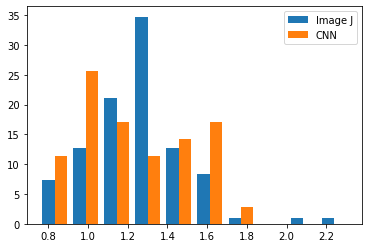

In [ ]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.07368421, 0.2       , 0.41052632, 0.75789474, 0.88421053,
         0.96842105, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.11428571, 0.37142857, 0.54285714, 0.65714286, 0.8       ,
         0.97142857, 1.        , 1.        , 1.        , 1.        ]]),
 array([0.75356807, 0.90995518, 1.06634229, 1.22272941, 1.37911652,
        1.53550363, 1.69189074, 1.84827785, 2.00466497, 2.16105208,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

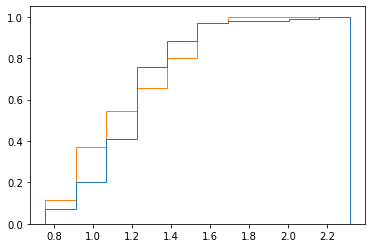

In [ ]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9423652209746187


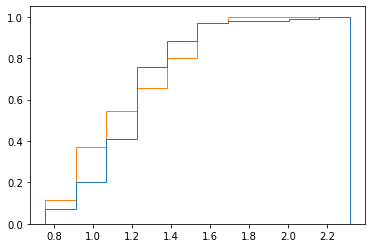

In [ ]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [ ]:
#df

In [ ]:
# r.history['accuracy']

In [ ]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [ ]:

df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a list of 2 Lists of Patches objects>
[0.75356807 0.90995518 1.06634229 1.22272941 1.37911652 1.53550363
 1.69189074 1.84827785 2.00466497 2.16105208 2.31743919]
[[ 7.36842105 12.63157895 21.05263158 34.73684211 12.63157895  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [11.42857143 25.71428571 17.14285714 11.42857143 14.28571429 17.14285714
   2.85714286  0.          0.          0.        ]]


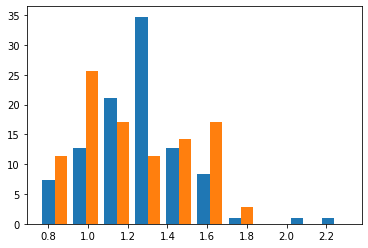

In [ ]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [ ]:
print(counts.sum())

200.00000000000014


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


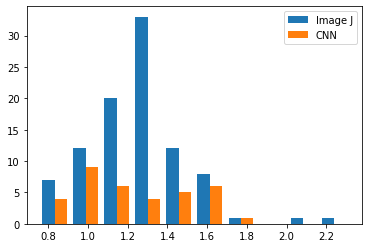

In [ ]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [ ]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1